In [1]:
import pandas as pd
from tables import *
import csv
import numpy as np
import pickle
import time
from scipy import sparse
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import os

In [2]:
path = "/mnt/disks/sdc/data/"

In [3]:
colors = [np.array([225,85,25]),
         np.array([45,121,198]),
         np.array([134,185,58])]
colors = [x/255 for x in colors]
#colors_out = [x/255 for x in colors]

In [4]:
groups_disc = {'Arts and Humanities':['Arts','Humanities'],
               'Health Sciences':['Clinical Medicine','Biomedical Research'],
               'Natural Sciences and Engineering':['Physics','Mathematics','Biology','Chemistry','Earth and Space','Engineering and Technology'],
               'Social Sciences':['Psychology','Professional Fields','Health','Social Sciences']             
              }

# With dictionaries

In [5]:
with open(path+'authors_disc.p','rb') as f:
    authors_disc_idx = pickle.load(f)
list_disciplines = list(authors_disc_idx.keys())
nb_disciplines = len(list_disciplines)

In [6]:
del authors_disc_idx

In [7]:
dict_stats = {}
for disc in list_disciplines:
    dict_stats[disc] = {}
    for i in range(3):
        dict_stats[disc][i] = []

In [ ]:
authors_info = {}
with open(path+'authors_info.csv','r') as f:
    reader = csv.reader(f,delimiter='\t')
    print(next(reader))
    for line in reader:
        authors_info[int(line[0])] = line[1]

['Cluster_ID', 'EDiscipline', 'Annee_Bibliographique']


In [ ]:
with open(path+'type_sim_refs_only_v2.csv','r') as f:
    reader =csv.reader(f)
    print(next(reader))
    for line in reader:
        disc = authors_info[int(line[2])]
        type_cit = int(line[3])
        sim = float(line[4])
        dict_stats[disc][type_cit].append(sim)

['Citant', 'Cite', 'Aut_Citant', 'Type_Cit', 'Sim']


for disc in list_disciplines:
    table = h5file_stats.get_node('/sim/{}'.format(disc))
    nb_lines = len(table)
    for line in table:
        type_cit = line['TypeCit']
        sim = line['Sim']
        dict_stats[disc][type_cit].append(sim)

In [108]:
results_disc = {}
for disc in list_disciplines:
    results_disc[disc] = []
    for i in range(3):
        results_disc[disc].append(np.mean(dict_stats[disc][i]))

In [10]:
import os

#### Histograms disc

In [ ]:
plt.figure(figsize=(30,30))
ax = plt.axes()
for i in range(nb_disciplines):
    disc = list_disciplines[i]
    data = dict_stats[disc]
    x1 = dict_stats[disc][0]
    x2 = dict_stats[disc][1]
    x3 = dict_stats[disc][2]

    kwargs = dict(alpha=0.5, bins=100)
    plt.subplot(4,4,i+1)
    plt.hist(x3, **kwargs, color=colors[0], label='Others')
    plt.hist(x2, **kwargs, color=colors[1], label='Network')
    plt.hist(x1, **kwargs, color=colors[2], label='Self')

    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    plt.tick_params(labelsize=12)
    plt.title(disc,size=20)
    plt.ylabel('Frequency')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
plt.show()
# out_path = path+'results_sim/'
# if not os.path.exists(out_path):
#     os.makedirs(out_path)
# plt.savefig(out_path+'distributions_sim_sample.png')
# plt.close()

####  Histogram group

In [112]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    
    x1 = []
    x2 = []
    x3 = []
    
    for disc in groups_disc[group]:
        x1 = x1 + dict_stats[disc][0]
        x2 = x2 + dict_stats[disc][1]
        x3 = x3 + dict_stats[disc][2]
    
    
    n_bins = 100
    kwargs = dict(histtype='step', alpha=1, bins=n_bins,linewidth=3)
    ax = plt.subplot(2,2,i+1)
    
    plt.hist(x3, **kwargs, color=colors[0], label='Others')
    plt.hist(x2, **kwargs, color=colors[1], label='Network')
    plt.hist(x1, **kwargs, color=colors[2], label='Self')
    
    kwargs = dict(alpha=0.2, bins=n_bins,linewidth=3)
    plt.hist(x3, **kwargs, color=colors[0], label='Others')
    plt.hist(x2, **kwargs, color=colors[1], label='Network')
    plt.hist(x1, **kwargs, color=colors[2], label='Self')
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

    scale_y = 1e3
    y_vals = ax.get_yticks()
    if i == 0:
        ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
    else:
        ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])

    plt.tick_params(labelsize=12)
    plt.title(group,size=20)
    plt.ylabel('Frequency [k]')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'hist_avg_per_art.png')
plt.savefig(out_path+'hist_avg_per_art.svg')
plt.close()


NameError: name 'os' is not defined

### Bar plots average

#### Avg sim

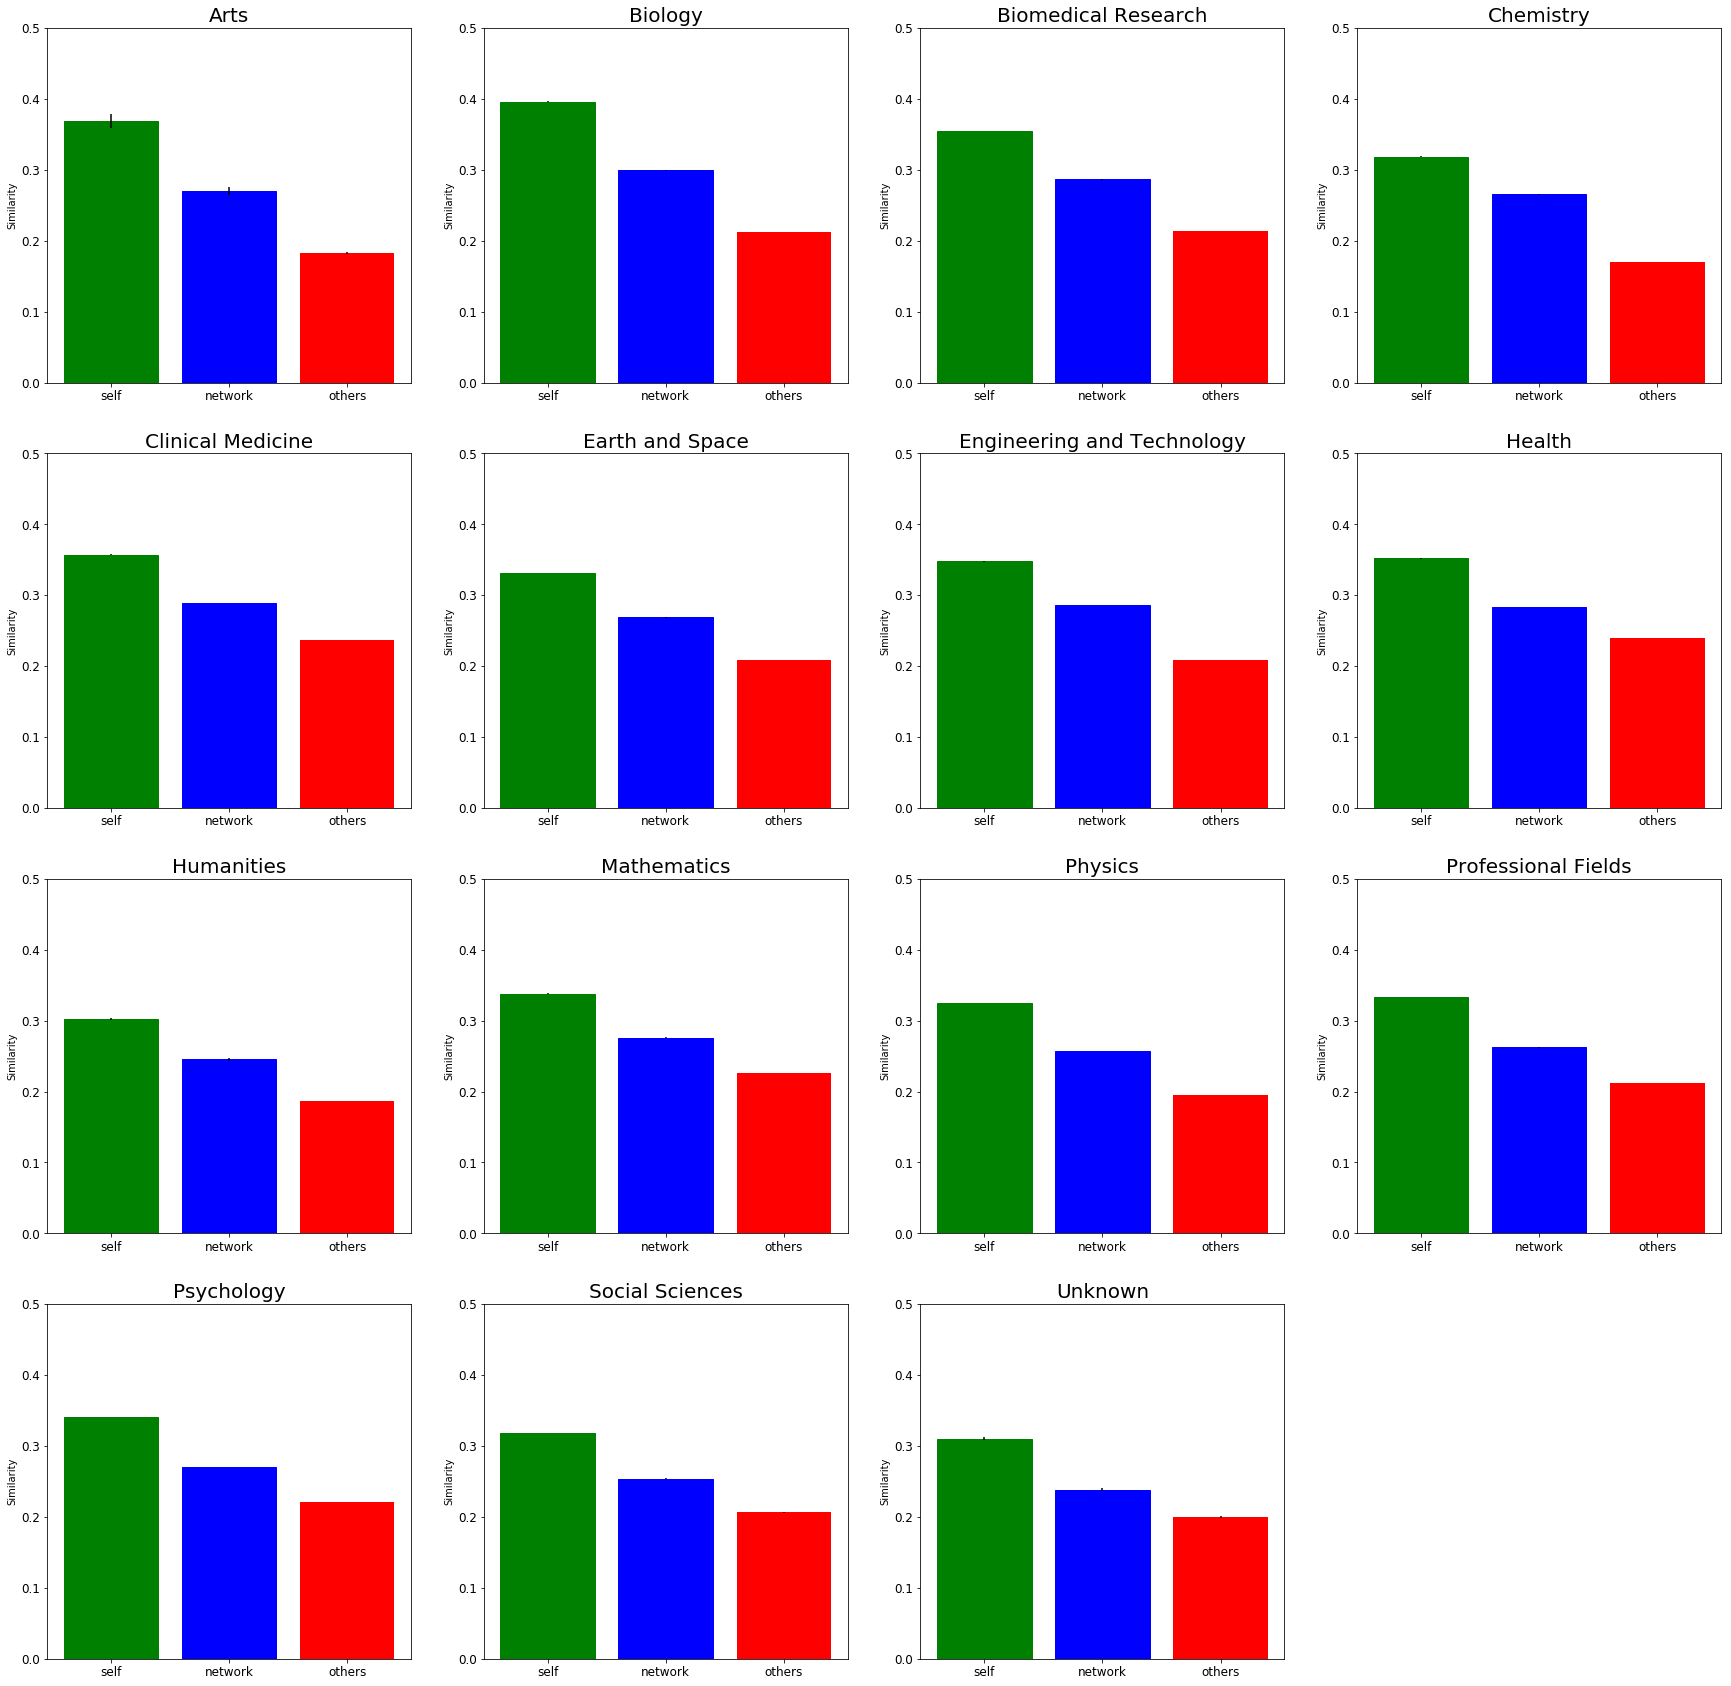

In [12]:
plt.figure(figsize=(30,30))
for i in range(nb_disciplines):
    disc = list_disciplines[i]
    data = dict_stats[disc]
    x1 = np.mean(dict_stats[disc][0])
    x2 = np.mean(dict_stats[disc][1])
    x3 = np.mean(dict_stats[disc][2])
    
    e1 = np.std(dict_stats[disc][0])/np.sqrt(len(dict_stats[disc][0]))
    e2 = np.std(dict_stats[disc][1])/np.sqrt(len(dict_stats[disc][1]))
    e3 = np.std(dict_stats[disc][2])/np.sqrt(len(dict_stats[disc][2]))

    plt.subplot(4,4,i+1)
    barlist = plt.bar([1,2,3],[x1,x2,x3],yerr=[e1,e2,e3], color='r')
    barlist[0].set_color('g')
    barlist[1].set_color('b')
    labels = ['self','network','others']
    plt.tick_params(labelsize=12)
    plt.xticks([1,2,3],labels)
    plt.title(disc,size=20)
    plt.ylabel('Similarity')
    plt.ylim([0,0.5])
    plt.legend()
out_path = path+'results_sim/'
plt.show()
# if not os.path.exists(out_path):
#     os.makedirs(out_path)
# plt.savefig(out_path+'bar_sim_sample.png')
# plt.close()

#### Disimilar proportion

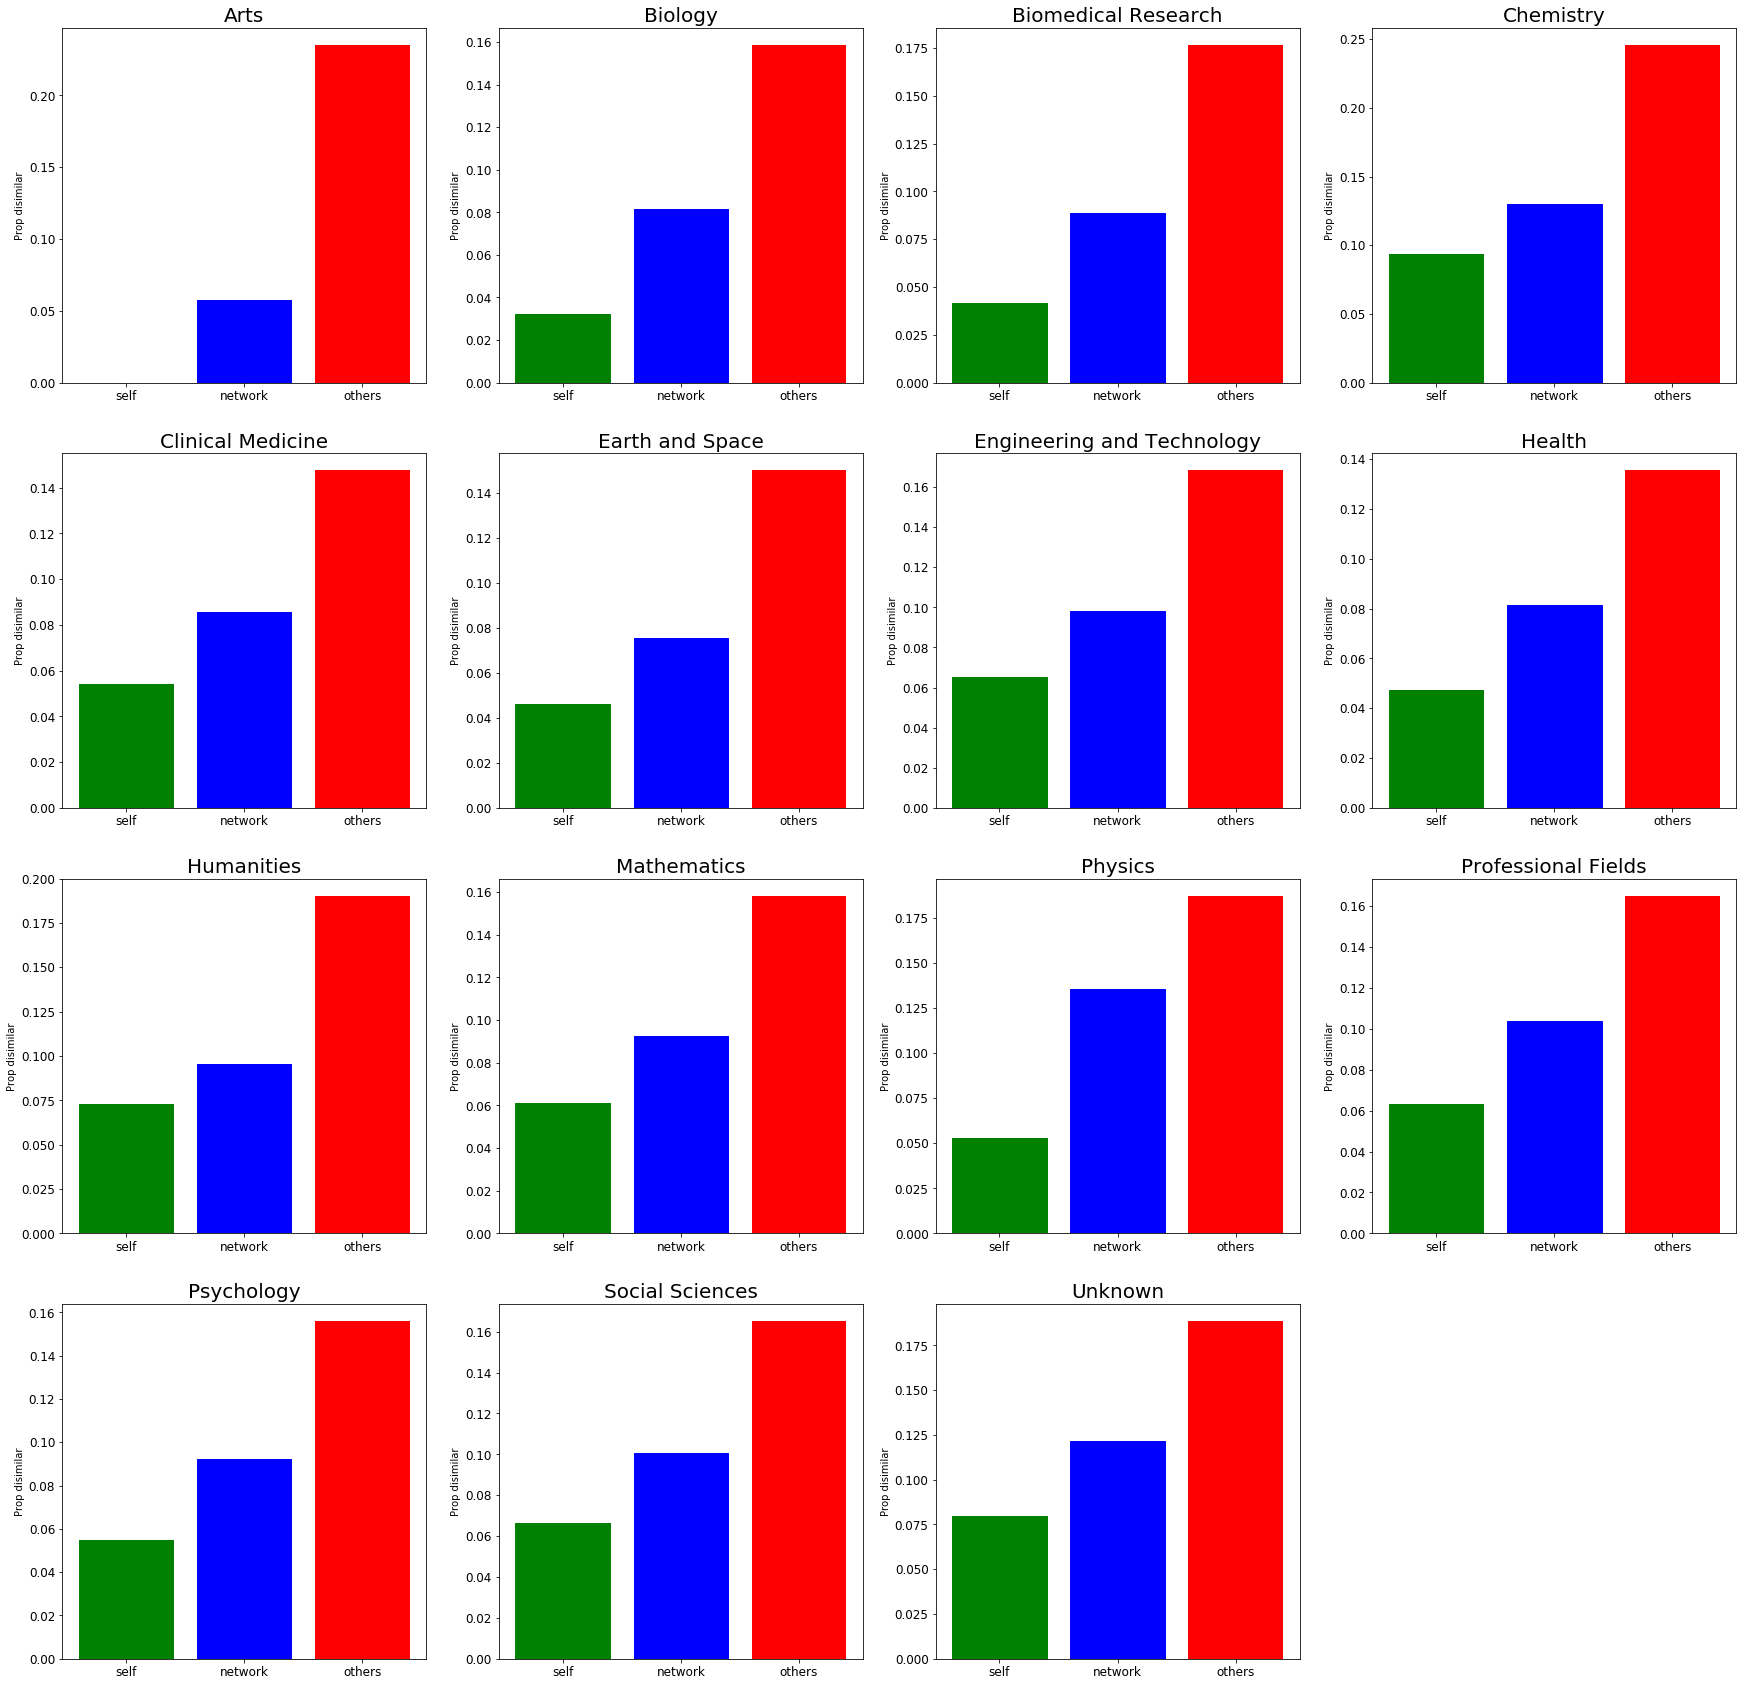

In [64]:
plt.figure(figsize=(30,30))
for i in range(nb_disciplines):
    disc = list_disciplines[i]
    data = dict_stats[disc]
    totals = np.array([len(data[j]) for j in range(3)])
    nb_dis = np.array([len(np.where(np.array(data[j]) < 0.05)[0]) for j in range(3)])
    prop_dis = np.divide(nb_dis,totals)
  
    plt.subplot(4,4,i+1)
    barlist = plt.bar([1,2,3],prop_dis, color='r')
    barlist[0].set_color('g')
    barlist[1].set_color('b')
    labels = ['self','network','others']
    plt.tick_params(labelsize=12)
    plt.xticks([1,2,3],labels)
    plt.title(disc,size=20)
    plt.ylabel('Prop disimilar')
    #plt.ylim([0,0.37])
    plt.legend()
out_path = path+'results_sim/'
plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'bar_prop_dis_sample.png')
plt.close()

# Use DF

In [5]:
disc_map = []
for key in groups_disc:
    for disc in groups_disc[key]:
        disc_map.append([key,disc])
disc_map = pd.DataFrame(disc_map,columns=['Group','EDiscipline'])

In [6]:
groups = list(groups_disc.keys())
nb_groups = len(groups)

In [7]:
authors_info = pd.read_csv(path+'authors_info.csv',sep='\t')

In [8]:
sim = pd.read_csv(path+'type_sim_refs_only_v2.csv')

In [9]:
len(sim)

1689894033

In [10]:
identical = np.where(sim['Sim']>=0.99)[0]

In [11]:
len(identical)

42373

In [12]:
sim.drop(identical,inplace=True)

In [15]:
data = pd.merge(authors_info,sim,left_on='Cluster_ID',right_on='Aut_Citant')

In [16]:
del sim

In [17]:
data = pd.merge(data,disc_map,on='EDiscipline')

In [18]:
articles = pd.read_csv(path+'article.txt',sep='\t')
articles.rename(columns={'Annee_Bibliographique':'Annee_Cite'},inplace=True)


/home/User1/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
data = pd.merge(data,articles[['ID_Art','Annee_Cite']],left_on='Cite',right_on='ID_Art')

In [20]:
articles.rename(columns={'Annee_Cite':'Annee_Citant'},inplace=True)

In [21]:
data = pd.merge(data,articles[['ID_Art','Annee_Citant']],left_on='Citant',right_on='ID_Art')

In [22]:
data['age_author'] = data['Annee_Citant'] - data['Annee_Bibliographique'] + 1

In [23]:
data['age_citation'] = data['Annee_Citant'] - data['Annee_Cite'] + 1

In [ ]:
data.to_csv(path+'data_combined.csv')
#data.to_csv(['ID_Art_x','ID_Art_y'],axis=1,inplace=True)

KeyboardInterrupt: 

## Author level cit sim

In [25]:
avg_sim_author = data.groupby(['Cluster_ID','Type_Cit']).agg({'Sim':['mean','count'],'EDiscipline':'max'})

MemoryError: 

In [ ]:
avg_sim_author.columns = ["_".join(x) for x in avg_sim_author.columns.ravel()]

In [ ]:
avg_sim_author.reset_index(inplace=True)

In [ ]:
count = data.groupby('Cluster_ID').agg({'Sim':'count'})
count.reset_index(inplace=True)
count.rename(columns={'Sim':'Count_cluster'},inplace=True)
avg_sim_author = pd.merge(avg_sim_author,count,on='Cluster_ID')

In [ ]:
avg_sim_author['prop_cit'] = avg_sim_author['Sim_count']/avg_sim_author['Count_cluster']

In [ ]:
avg_sim_author = pd.merge(avg_sim_author,disc_map,left_on='EDiscipline_max',right_on='EDiscipline')

In [ ]:
colors = [np.array([225,85,25]),
         np.array([45,121,198]),
         np.array([134,185,58])]
colors = [x/255 for x in colors]
#colors_out = [x/255 for x in colors]

##### Histogram

In [ ]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    x1 = avg_sim_author.loc[(avg_sim_author['Group']==group) & (avg_sim_author['Type_Cit']==0),'Sim_mean']
    x2 = avg_sim_author.loc[(avg_sim_author['Group']==group) & (avg_sim_author['Type_Cit']==1),'Sim_mean']
    x3 = avg_sim_author.loc[(avg_sim_author['Group']==group) & (avg_sim_author['Type_Cit']==2),'Sim_mean']
    
    n_bins = 125
    kwargs = dict(histtype='step', alpha=1, bins=n_bins,linewidth=3)
    ax = plt.subplot(2,2,i+1)
    
    plt.hist(x3, **kwargs, color=colors[0], label='Others')
    plt.hist(x2, **kwargs, color=colors[1], label='Network')
    plt.hist(x1, **kwargs, color=colors[2], label='Self')
    plt.xlabel('Similarity')

    kwargs = dict(alpha=0.2, bins=n_bins,linewidth=3)
    plt.hist(x3, **kwargs, color=colors[0], label='Others')
    plt.hist(x2, **kwargs, color=colors[1], label='Network')
    plt.hist(x1, **kwargs, color=colors[2], label='Self')
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

    scale_y = 1e3
    y_vals = ax.get_yticks()
    if i == 0:
        ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
    else:
        ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    plt.rcParams.update({'font.size': 22})
    plt.tick_params(labelsize=18)
    plt.title(group,size=25)
    plt.ylabel('Frequency [k]')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
plt.show()
# if not os.path.exists(out_path):
#     os.makedirs(out_path)
# plt.savefig(out_path+'hist_avg_per_authors.png')
# plt.savefig(out_path+'hist_avg_per_authors.svg')
# plt.close()


##### Sim by prop

In [79]:
df_prop = avg_sim_author.copy()
df_prop = df_prop.loc[df_prop['Count_cluster']>=20]

In [80]:
#bins_self = np.concatenate([np.linspace(0,0.35,14),[0.4,1]])
#bins_other = np.concatenate([[0,0.2,0.4],np.linspace(0.45,1,15)])
bins = np.linspace(0,1,11)
df_hist = df_prop.copy()
df_hist['binned'] = pd.cut(df_hist['Sim_mean'],bins)
df_hist = df_hist.groupby(['binned','Type_Cit','Group']).agg({'prop_cit':'count'}).reset_index()
df_hist.columns = ["".join(x) for x in df_hist.columns.ravel()]
df_hist['bin_x'] = df_hist.apply(lambda x: x['binned'].mid,axis=1)

df_prop.loc[df_prop['Type_Cit'].isin([0,1]),'binned'] = pd.cut(df_prop.loc[df_prop['Type_Cit'].isin([0,1]),'prop_cit'],
                                                               bins_self)
df_prop.loc[df_prop['Type_Cit'] == 2,'binned'] = pd.cut(df_prop.loc[df_prop['Type_Cit'] == 2,'prop_cit'], 
                                                               bins_other)

In [81]:
for group in groups:
    for type_cit in range(3):
        df_prop.loc[(df_prop['Group'] == group) & (df_prop['Type_Cit'] == type_cit),'qbinned'] = pd.qcut(df_prop.loc[(df_prop['Group'] == group) & 
                                                                                                                     (df_prop['Type_Cit'] == type_cit),'Sim_mean'],15)

In [82]:
df_prop = df_prop.groupby(['qbinned','Type_Cit','Group']).agg({'prop_cit':['mean','count']}).reset_index()

In [83]:
df_prop.columns = ["".join(x) for x in df_prop.columns.ravel()]

In [84]:
df_prop['bin_x'] = df_prop.apply(lambda x: x['qbinned'].mid,axis=1)

In [86]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    x1 = df_prop.loc[(df_prop['Group']==group) & (df_prop['Type_Cit']==0),
                          ['bin_x','prop_citmean']]
    x2 = df_prop.loc[(df_prop['Group']==group) & (df_prop['Type_Cit']==1),
                          ['bin_x','prop_citmean']]
    x3 = df_prop.loc[(df_prop['Group']==group) & (df_prop['Type_Cit']==2),
                          ['bin_x','prop_citmean']]
    
    
    kwargs = dict(alpha=1,linewidth=2,marker=".",markersize=10)
    ax = plt.subplot(2,2,i+1)
    
    plt.plot(x3['bin_x'],x3['prop_citmean'], **kwargs, color=colors[0], label='Others')
    plt.plot(x2['bin_x'],x2['prop_citmean'],**kwargs, color=colors[1], label='Network')
    plt.plot(x1['bin_x'],x1['prop_citmean'], **kwargs, color=colors[2], label='Self')
    
    
   
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

#     scale_y = 1e3
#     y_vals = ax.get_yticks()
#     if i == 0:
#         ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
#     else:
#         ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    #plt.xlim([1980,2019])
    #plt.ylim([0.1,0.5])

    plt.title(group,size=25)
    plt.ylabel('Proportion citation type')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('Average similarity')
    ax2 = ax.twinx()
    x1 = df_hist.loc[(df_hist['Group']==group) & (df_hist['Type_Cit']==0),
                          ['bin_x','prop_cit']]
    x2 = df_hist.loc[(df_hist['Group']==group) & (df_hist['Type_Cit']==1),
                          ['bin_x','prop_cit']]
    x3 = df_hist.loc[(df_hist['Group']==group) & (df_hist['Type_Cit']==2),
                          ['bin_x','prop_cit']]
    
    
    kwargs = dict(alpha=0.5,linewidth=3,linestyle='--')
    
    plt.plot(x3['bin_x'],x3['prop_cit'], **kwargs, color=colors[0], label='Others')
    plt.plot(x2['bin_x'],x2['prop_cit'],**kwargs, color=colors[1], label='Network')
    plt.plot(x1['bin_x'],x1['prop_cit'], **kwargs, color=colors[2], label='Self')
    plt.ylabel('# Authors (k)')
    scale_y = 1e3
    y_vals = ax2.get_yticks()
    if i == 0:
        ax2.set_yticklabels(['{:.2f}'.format(x /scale_y) for x in y_vals])
    else:
        ax2.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'sim_per_prop_cit_inverted.png')
plt.savefig(out_path+'sim_per_prop_cit_inverted.svg')
plt.close()


#### Sim by prop 

In [50]:
df_prop = avg_sim_author.copy()
df_prop = df_prop.loc[df_prop['Count_cluster']>=20]

In [52]:
#bins_self = np.concatenate([np.linspace(0,0.35,14),[0.4,1]])
#bins_other = np.concatenate([[0,0.2,0.4],np.linspace(0.45,1,15)])
bins = np.linspace(0,1,11)
df_hist = df_prop.copy()
df_hist['binned'] = pd.cut(df_hist['Sim_mean'],bins)
df_hist = df_hist.groupby(['binned','Type_Cit','Group']).agg({'Sim_mean':'count'}).reset_index()
df_hist.columns = ["".join(x) for x in df_hist.columns.ravel()]
df_hist['bin_x'] = df_hist.apply(lambda x: x['binned'].mid,axis=1)

In [53]:
for group in groups:
    for type_cit in range(3):
        df_prop.loc[(df_prop['Group'] == group) & (df_prop['Type_Cit'] == type_cit),'qbinned'] = pd.qcut(df_prop.loc[(df_prop['Group'] == group) & 
                                                                                                                     (df_prop['Type_Cit'] == type_cit),'prop_cit'],15)

In [54]:
df_prop = df_prop.groupby(['qbinned','Type_Cit','Group']).agg({'Sim_mean':['mean','count']}).reset_index()
df_prop.columns = ["".join(x) for x in df_prop.columns.ravel()]
df_prop['bin_x'] = df_prop.apply(lambda x: x['qbinned'].mid,axis=1)

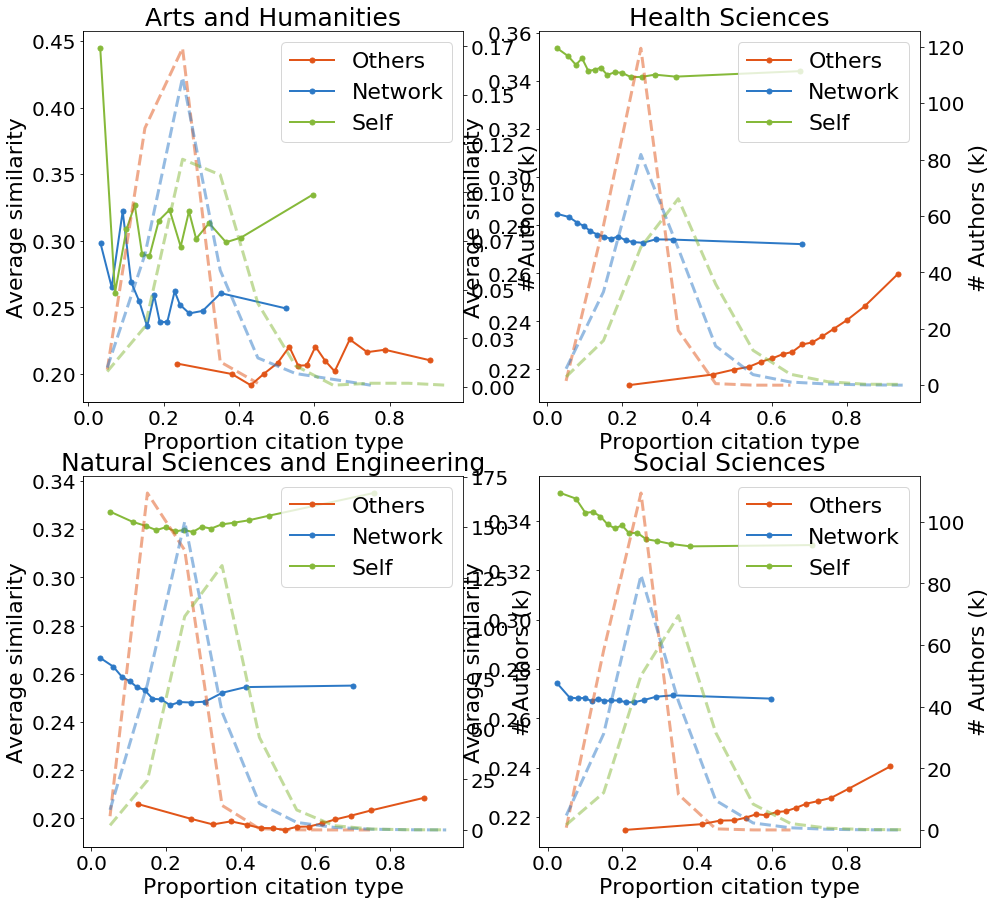

In [55]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    x1 = df_prop.loc[(df_prop['Group']==group) & (df_prop['Type_Cit']==0),
                          ['bin_x','Sim_meanmean']]
    x2 = df_prop.loc[(df_prop['Group']==group) & (df_prop['Type_Cit']==1),
                          ['bin_x','Sim_meanmean']]
    x3 = df_prop.loc[(df_prop['Group']==group) & (df_prop['Type_Cit']==2),
                          ['bin_x','Sim_meanmean']]
    
    
    kwargs = dict(alpha=1,linewidth=2,marker=".",markersize=10)
    ax = plt.subplot(2,2,i+1)
    
    plt.plot(x3['bin_x'],x3['Sim_meanmean'], **kwargs, color=colors[0], label='Others')
    plt.plot(x2['bin_x'],x2['Sim_meanmean'],**kwargs, color=colors[1], label='Network')
    plt.plot(x1['bin_x'],x1['Sim_meanmean'], **kwargs, color=colors[2], label='Self')
    
    
   
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

#     scale_y = 1e3
#     y_vals = ax.get_yticks()
#     if i == 0:
#         ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
#     else:
#         ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    #plt.xlim([1980,2019])
    #plt.ylim([0.1,0.5])

    plt.title(group,size=25)
    plt.ylabel('Average similarity')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('Proportion citation type')
    ax2 = ax.twinx()
    x1 = df_hist.loc[(df_hist['Group']==group) & (df_hist['Type_Cit']==0),
                          ['bin_x','Sim_mean']]
    x2 = df_hist.loc[(df_hist['Group']==group) & (df_hist['Type_Cit']==1),
                          ['bin_x','Sim_mean']]
    x3 = df_hist.loc[(df_hist['Group']==group) & (df_hist['Type_Cit']==2),
                          ['bin_x','Sim_mean']]
    
    
    kwargs = dict(alpha=0.5,linewidth=3,linestyle='--')
    
    plt.plot(x3['bin_x'],x3['Sim_mean'], **kwargs, color=colors[0], label='Others')
    plt.plot(x2['bin_x'],x2['Sim_mean'],**kwargs, color=colors[1], label='Network')
    plt.plot(x1['bin_x'],x1['Sim_mean'], **kwargs, color=colors[2], label='Self')
    plt.ylabel('# Authors (k)')
    scale_y = 1e3
    y_vals = ax2.get_yticks()
    if i == 0:
        ax2.set_yticklabels(['{:.2f}'.format(x /scale_y) for x in y_vals])
    else:
        ax2.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
out_path = path+'results_sim/'
plt.show()
# if not os.path.exists(out_path):
#     os.makedirs(out_path)
# plt.savefig(out_path+'sim_per_prop_cit.png')
# plt.savefig(out_path+'sim_per_prop_cit.svg')
# plt.close()


## Year level sim

In [32]:
avg_sim_year = data.groupby(['Group','Type_Cit','Annee_Citant']).agg({'Sim':['mean','sem']})

In [33]:
avg_sim_year.reset_index(inplace=True)
avg_sim_year.reset_index(inplace=True)

In [34]:
avg_sim_year.columns = [''.join(col) for col in avg_sim_year.columns]

#### Year citing

In [47]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    x1 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==0),
                          ['Simmean','Simsem','Annee_Citant']]
    x2 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==1),
                          ['Simmean','Simsem','Annee_Citant']]
    x3 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==2),
                          ['Simmean','Simsem','Annee_Citant']]
    
    
    
    kwargs = dict(alpha=1,linewidth=3)
    ax = plt.subplot(2,2,i+1)
    
    plt.errorbar(x3['Annee_Citant'],x3['Simmean'], yerr= x3['Simsem'], **kwargs, color=colors[0], label='Others')
    plt.errorbar(x2['Annee_Citant'],x2['Simmean'], yerr= x2['Simsem'],**kwargs, color=colors[1], label='Network')
    plt.errorbar(x1['Annee_Citant'],x1['Simmean'], yerr= x1['Simsem'], **kwargs, color=colors[2], label='Self')
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

#     scale_y = 1e3
#     y_vals = ax.get_yticks()
#     if i == 0:
#         ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
#     else:
#         ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    plt.xlim([1995,2019])
    plt.ylim([0.1,0.5])
    plt.title(group,size=25)
    plt.ylabel('Average similarity')
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('Year citing')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'avg_year_citing.png')
plt.savefig(out_path+'avg_year_citing.svg')
plt.close()

#### Year cited

In [50]:
avg_sim_year = data.groupby(['Group','Type_Cit','Annee_Cite']).agg({'Sim':['mean','sem']})
avg_sim_year.reset_index(inplace=True)
avg_sim_year.reset_index(inplace=True)
avg_sim_year.columns = [''.join(col) for col in avg_sim_year.columns]

In [53]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    x1 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==0),
                          ['Simmean','Simsem','Annee_Cite']]
    x2 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==1),
                          ['Simmean','Simsem','Annee_Cite']]
    x3 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==2),
                          ['Simmean','Simsem','Annee_Cite']]
    
    
    
    kwargs = dict(alpha=1,linewidth=3)
    ax = plt.subplot(2,2,i+1)
    
    plt.errorbar(x3['Annee_Cite'],x3['Simmean'], yerr= x3['Simsem'], **kwargs, color=colors[0], label='Others')
    plt.errorbar(x2['Annee_Cite'],x2['Simmean'], yerr= x2['Simsem'],**kwargs, color=colors[1], label='Network')
    plt.errorbar(x1['Annee_Cite'],x1['Simmean'], yerr= x1['Simsem'], **kwargs, color=colors[2], label='Self')
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

#     scale_y = 1e3
#     y_vals = ax.get_yticks()
#     if i == 0:
#         ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
#     else:
#         ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    plt.xlim([1995,2019])
    plt.ylim([0.1,0.5])
    plt.title(group,size=25)
    plt.ylabel('Average similarity')
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('Year cited')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'avg_year_cited.png')
plt.savefig(out_path+'avg_year_cited.svg')
plt.close()

#### Age cited

In [28]:
temp = data.loc[data['age_citation']>0]
avg_sim_year = temp.groupby(['Group','Type_Cit','age_citation']).agg({'Sim':['mean','sem']})

avg_sim_year.reset_index(inplace=True)
avg_sim_year.reset_index(inplace=True)
avg_sim_year.columns = [''.join(col) for col in avg_sim_year.columns]

In [30]:
avg_sim_year.head()

,index,Group,Type_Cit,age_citation,Simmean,Simsem
0,0,Arts and Humanities,0,1,0.384820,0.005359
1,1,Arts and Humanities,0,2,0.299252,0.002782
2,2,Arts and Humanities,0,3,0.288130,0.003615
3,3,Arts and Humanities,0,4,0.274148,0.004858
4,4,Arts and Humanities,0,5,0.272992,0.006673


In [36]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    x1 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==0),
                          ['Simmean','Simsem','age_citation']]
    x2 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==1),
                          ['Simmean','Simsem','age_citation']]
    x3 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==2),
                          ['Simmean','Simsem','age_citation']]
    
    
    
    kwargs = dict(alpha=1,linewidth=3)
    ax = plt.subplot(2,2,i+1)
    
    plt.errorbar(x3['age_citation'],x3['Simmean'], yerr= x3['Simsem'], **kwargs, color=colors[0], label='Others')
    plt.errorbar(x2['age_citation'],x2['Simmean'], yerr= x2['Simsem'],**kwargs, color=colors[1], label='Network')
    plt.errorbar(x1['age_citation'],x1['Simmean'], yerr= x1['Simsem'], **kwargs, color=colors[2], label='Self')
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

#     scale_y = 1e3
#     y_vals = ax.get_yticks()
#     if i == 0:
#         ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
#     else:
#         ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    plt.xlim([0,35])
    #plt.ylim([0.1,0.5])
    plt.title(group,size=25)
    plt.ylabel('Average similarity')
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('Year difference')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'diff_year_citation.png')
plt.savefig(out_path+'diff_year_citation.svg')
plt.close()

#### Age author

In [37]:
temp = data.loc[data['age_author']>0]
avg_sim_year = temp.groupby(['Group','Type_Cit','age_author']).agg({'Sim':['mean','sem']})

avg_sim_year.reset_index(inplace=True)
avg_sim_year.reset_index(inplace=True)
avg_sim_year.columns = [''.join(col) for col in avg_sim_year.columns]

In [39]:
plt.figure(figsize=(15,15))
for i in range(nb_groups):
    group = groups[i]
    x1 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==0),
                          ['Simmean','Simsem','age_author']]
    x2 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==1),
                          ['Simmean','Simsem','age_author']]
    x3 = avg_sim_year.loc[(avg_sim_year['Group']==group) & (avg_sim_year['Type_Cit']==2),
                          ['Simmean','Simsem','age_author']]
    
    
    
    kwargs = dict(alpha=1,linewidth=3)
    ax = plt.subplot(2,2,i+1)
    
    plt.errorbar(x3['age_author'],x3['Simmean'], yerr= x3['Simsem'], **kwargs, color=colors[0], label='Others')
    plt.errorbar(x2['age_author'],x2['Simmean'], yerr= x2['Simsem'],**kwargs, color=colors[1], label='Network')
    plt.errorbar(x1['age_author'],x1['Simmean'], yerr= x1['Simsem'], **kwargs, color=colors[2], label='Self')
    
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

#     scale_y = 1e3
#     y_vals = ax.get_yticks()
#     if i == 0:
#         ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
#     else:
#         ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
    plt.xlim([0,35])
    #plt.ylim([0.1,0.5])
    plt.title(group,size=25)
    plt.ylabel('Average similarity')
    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
    plt.xlabel('Year difference')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'sim_age_author.png')
plt.savefig(out_path+'sim_age_author.svg')
plt.close()

### Art level sim

#### Histogram similiarity articles

In [43]:
plt.figure(figsize=(15,15))

for i in range(nb_groups):
    group = groups[i]
    
    x1 = data.loc[(data['Group']==group) & (data['Type_Cit']==0),'Sim']
    x2 = data.loc[(data['Group']==group) & (data['Type_Cit']==1),'Sim']
    x3 = data.loc[(data['Group']==group) & (data['Type_Cit']==2),'Sim']
     
    n_bins = 125
    kwargs = dict(histtype='step', alpha=1, bins=n_bins,linewidth=3)
    ax = plt.subplot(2,2,i+1)
    
    plt.hist(x3, **kwargs, color=colors[0], label='Others')
    plt.hist(x2, **kwargs, color=colors[1], label='Network')
    plt.hist(x1, **kwargs, color=colors[2], label='Self')
    
    kwargs = dict(alpha=0.2, bins=n_bins,linewidth=3)
    plt.hist(x3, **kwargs, color=colors[0], label='Others')
    plt.hist(x2, **kwargs, color=colors[1], label='Network')
    plt.hist(x1, **kwargs, color=colors[2], label='Self')
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

    scale_y = 1e3
    y_vals = ax.get_yticks()
    if i == 0:
        ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
    else:
        ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])

    plt.tick_params(labelsize=20)
    plt.rcParams.update({'font.size': 22})
    plt.title(group,size=25)
    plt.ylabel('# Articles (k)')
    plt.xlabel('Similarity')
    #plt.gca().set(title=disc, ylabel='Frequency')
    plt.legend()
out_path = path+'results_sim/'
#plt.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'hist_avg_per_art.png')
plt.savefig(out_path+'hist_avg_per_art.svg')
plt.close()


#### Average similarity articles

In [51]:
df_avg = data.groupby(['Group','Type_Cit']).agg({'Sim':['mean','sem']}).reset_index()

In [52]:
df_avg.columns = [''.join(col) for col in df_avg.columns]

In [53]:
df_avg.head()

,Group,Type_Cit,Simmean,Simsem
0,Arts and Humanities,0,0.305801,0.001834
1,Arts and Humanities,1,0.248743,0.001799
2,Arts and Humanities,2,0.186290,0.000556
3,Health Sciences,0,0.357195,0.000122
4,Health Sciences,1,0.288987,0.000084


In [58]:
colors_groups = [np.array([168,23,36]),
         np.array([247,42,49]),
         np.array([124,185,0]),
         np.array([155,215,23])]
colors_groups = [x/255 for x in colors_groups]

In [76]:
plt.figure(figsize=(8,8))
ax = plt.axes()

group = groups[i]
x1 = df_avg.loc[(df_avg['Group']==groups[0]),['Simmean','Simsem','Type_Cit']]
x2 = df_avg.loc[(df_avg['Group']==groups[1]),['Simmean','Simsem','Type_Cit']]
x3 = df_avg.loc[(df_avg['Group']==groups[2]),['Simmean','Simsem','Type_Cit']]
x4 = df_avg.loc[(df_avg['Group']==groups[3]),['Simmean','Simsem','Type_Cit']]




kwargs = dict(alpha=1,linewidth=3,marker='.',markersize=15)



# plt.errorbar(x1['Type_Cit'],x1['Simmean'], yerr= x1['Simsem'], **kwargs, color=colors_groups[0], label=groups[0])
# plt.errorbar(x2['Type_Cit'],x2['Simmean'], yerr= x2['Simsem'],**kwargs, color=colors_groups[1], label=groups[1])
# plt.errorbar(x3['Type_Cit'],x3['Simmean'], yerr= x3['Simsem'], **kwargs, color=colors_groups[2], label=groups[2])
# plt.errorbar(x4['Type_Cit'],x4['Simmean'], yerr= x4['Simsem'], **kwargs, color=colors_groups[3], label=groups[3])

plt.plot(x1['Type_Cit'],x1['Simmean'],  **kwargs, color=colors_groups[0], label=groups[0])
plt.plot(x2['Type_Cit'],x2['Simmean'], **kwargs, color=colors_groups[1], label=groups[1])
plt.plot(x3['Type_Cit'],x3['Simmean'],  **kwargs, color=colors_groups[2], label=groups[2])
plt.plot(x4['Type_Cit'],x4['Simmean'],  **kwargs, color=colors_groups[3], label=groups[3])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


#     scale_y = 1e3
#     y_vals = ax.get_yticks()
#     if i == 0:
#         ax.set_yticklabels(['{:.1f}'.format(x /scale_y) for x in y_vals])
#     else:
#         ax.set_yticklabels(['{:d}'.format(int(x /scale_y)) for x in y_vals])
#plt.xlim([1980,2019])
#plt.ylim([0.1,0.5])
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Self','Network','Others'])
plt.tick_params(labelsize=20)
plt.title(group,size=25)
plt.ylabel('Average similarity')
#plt.gca().set(title=disc, ylabel='Frequency')
plt.legend()
out_path = path+'results_sim/'
#.show()
if not os.path.exists(out_path):
    os.makedirs(out_path)
plt.savefig(out_path+'sim_avg_per_cit_type.png')
plt.savefig(out_path+'sim_avg_per_cit_type.svg')
plt.close()